# Analyzing Customer Demographics & Behavior to Drive Data-Driven Product Recommendations

## By - Vrushabh Kasliwal

## About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Aerofit.csv")

# Basic Analysis

In [ ]:
# First 10 rows
data.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [ ]:
# Finding total number of rows and columns.
shape = data.shape

In [ ]:
print(f"Number of Rows : {shape[0]}\nNumber of Columns : {shape[1]}")

Number of Rows : 180
Number of Columns : 9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### From above analysis it is clear we have 3 object columns and 6 int64 columns with no null values.

In [ ]:
# Finding(Rechecking) null values in all columns
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### From above analysis it is clear we don't have any null values in any columns

In [ ]:
# Finding some basic matrics of columns.
data.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### Some Insights from above code's analysis:-
1) Aerofit have 3 unique products, KP281 being the most frequent / popular product.
2) Mean Age of Aerofit customers is 28.78 with minimum age 18 & goes till maximum age 50.
3) 75% of customers belongs from age 18 to 33, which indicates that we have more young & early mid age customers.
4) Mean education years of customers is 15.57 year ranging from min 12 year to max 21 year.
5) 75% of customers lie in <= 16 years of education.
6) Out of 180 customers data, 107 are Partnered.
7) Mean usage of treadmill per week is 3.45 days , with 75% customers using 2 days to 4 days a week.
8) Mean fitness of customers is 3.31, with 75% customer <= 4 on the scale of 0 to 5 (0 being bad, 5 being best).
9) Standard deviation of Income & Miles are high, which indicates they may have potential outliers. So mean data may not give proper picture in this case.

# Non Graphical Analysis

In [ ]:
data.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# This will return unique products in our data.
data["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
# Finding how many times a product has appered.
data["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
# Finding count of Male & Female in our data.
data["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
# Counts for each unique age in our data.
data["Age"].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [ ]:
# Counts for each Education years in our data.
data["Education"].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [ ]:
data["MaritalStatus"].unique()

array(['Single', 'Partnered'], dtype=object)

In [ ]:
# Finding single & partnered counts.
data["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
# Number of times each usage count occured.
data["Usage"].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [ ]:
# Counts for each fitness number.
data["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [ ]:
# Finding median salary of customers
np.median(data["Income"])

50596.5

In [ ]:
# Finding median of average miles customer walk per week
np.median(data["Miles"])

94.0

# Visual Analysis :-
## (Univariate Analysis)

### Understanding distribution of data for quantitative attributes
1) Age
2) Education
3) Usage
4) Fitness
5) Income
6) Miles

In [ ]:
data.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


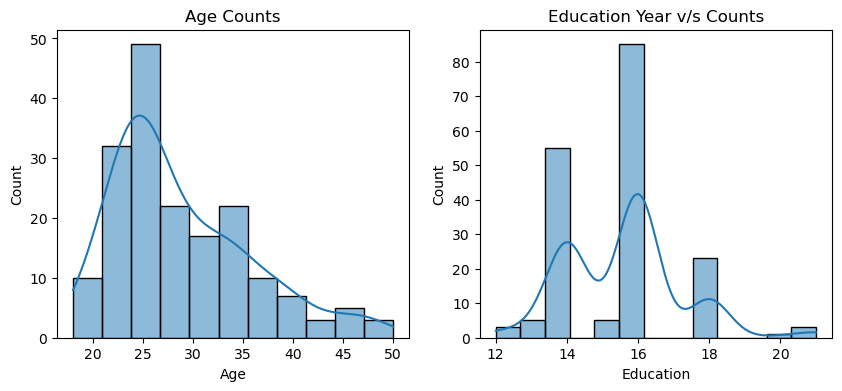

In [ ]:
# For Age & Education
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

sns.histplot(data = data, x = "Age", kde = True, ax = axis[0])
sns.histplot(data = data, x = "Education", kde = True, ax = axis[1])

axis[0].set_title("Age Counts")
axis[1].set_title("Education Year v/s Counts")

plt.tight_layout
plt.show()

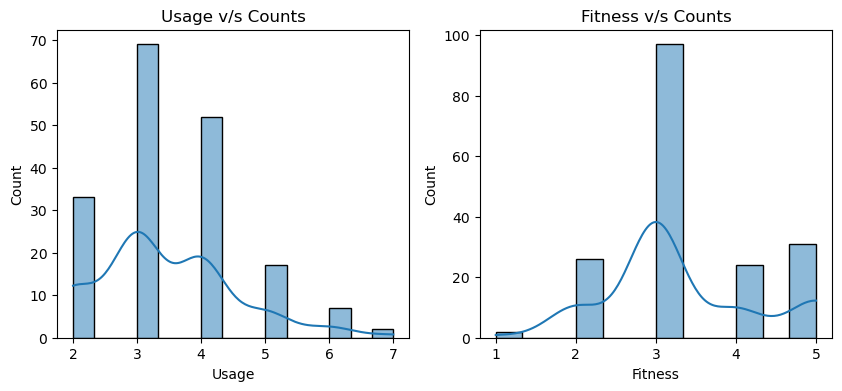

In [ ]:
# For Usage & Fitness
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

sns.histplot(data = data, x = "Usage", kde = True, ax = axis[0])
sns.histplot(data = data, x = "Fitness", kde = True, ax = axis[1])

axis[0].set_title("Usage v/s Counts")
axis[1].set_title("Fitness v/s Counts")

plt.tight_layout
plt.show()

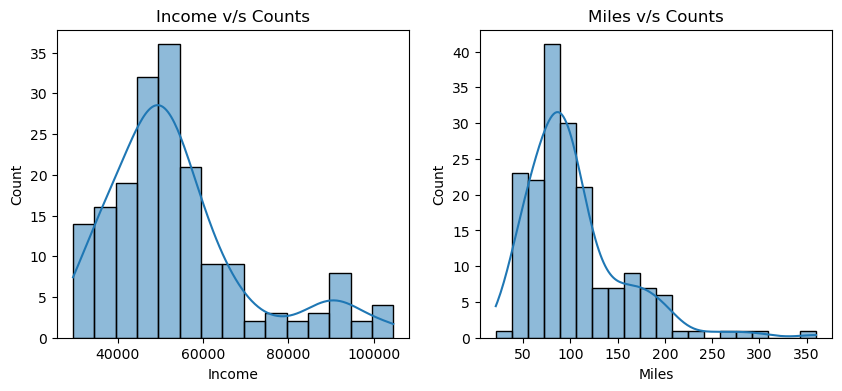

In [ ]:
# For Income & Miles
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

sns.histplot(data = data, x = "Income", kde = True, ax = axis[0])
sns.histplot(data = data, x = "Miles", kde = True, ax = axis[1])

axis[0].set_title("Income v/s Counts")
axis[1].set_title("Miles v/s Counts")

plt.tight_layout
plt.show()

#### We can match each answer from graphical analysis with our non graphical analysis , in both cases results are same , means we are going in right direction in our analysis.

## Checking for potential outliers

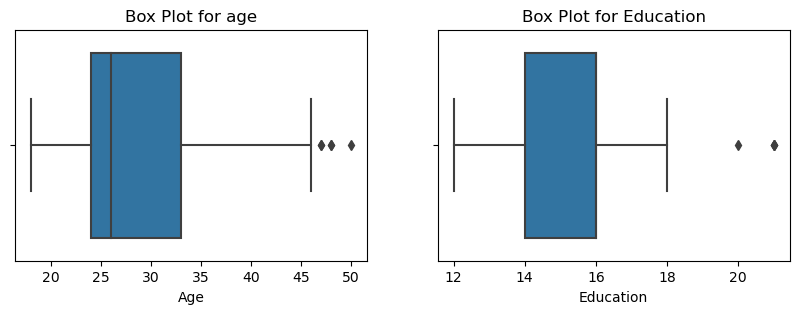

In [ ]:
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10,3))

sns.boxplot(data = data, x = "Age", ax = axis[0])
sns.boxplot(data = data, x = "Education", ax = axis[1])

axis[0].set_title("Box Plot for age")
axis[1].set_title("Box Plot for Education")
plt.show()

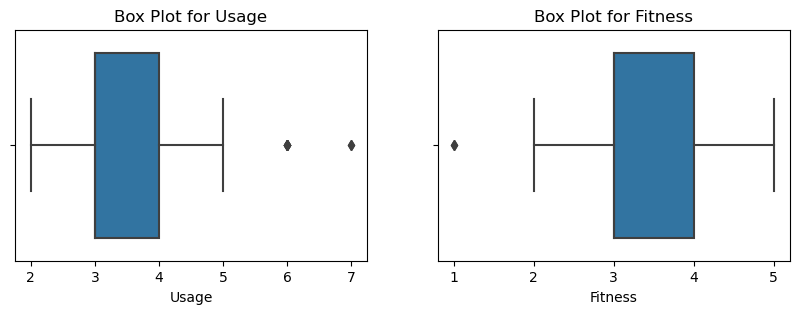

In [ ]:
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10,3))

sns.boxplot(data = data, x = "Usage", ax = axis[0])
sns.boxplot(data = data, x = "Fitness", ax = axis[1])

axis[0].set_title("Box Plot for Usage")
axis[1].set_title("Box Plot for Fitness")
plt.show()

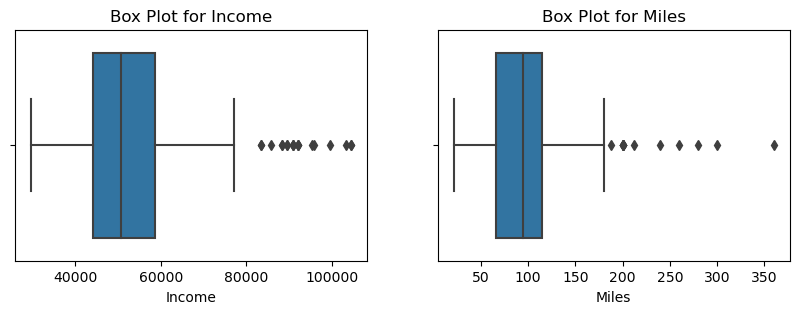

In [ ]:
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10,3))

sns.boxplot(data = data, x = "Income", ax = axis[0])
sns.boxplot(data = data, x = "Miles", ax = axis[1])

axis[0].set_title("Box Plot for Income")
axis[1].set_title("Box Plot for Miles")
plt.show()

### It is clear from box plot Age, Education, Usage have very few outliers but Income and Miles are having more outliers.

### Understanding distribution of data for quantitative attributes
1) Product
2) Gender
3) Marital Status

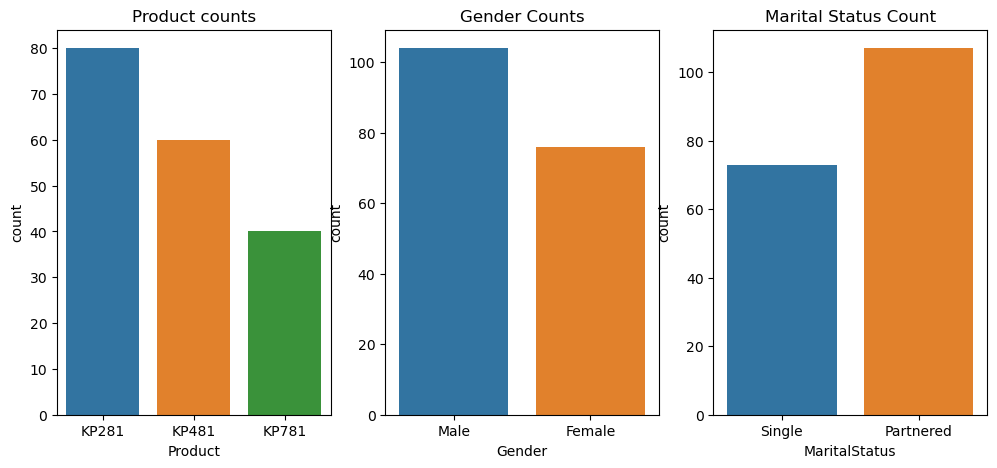

In [ ]:
fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize = (12,5))

sns.countplot(data = data, x = "Product", ax = axis[0])
sns.countplot(data = data, x = "Gender", ax = axis[1])
sns.countplot(data = data, x = "MaritalStatus", ax = axis[2])

axis[0].set_title("Product counts")
axis[1].set_title("Gender Counts")
axis[2].set_title("Marital Status Count")

plt.show()

In [ ]:
Product_percentage = data['Product'].value_counts(normalize = True) * 100
gender_percentage = data['Gender'].value_counts(normalize=True) * 100
marital_status_percentage = data['MaritalStatus'].value_counts(normalize=True) * 100

# Print the results
print("Percentage Contribution of Products:")
print(Product_percentage)

print("\nPercentage Contribution by Gender:")
print(gender_percentage)

print("\nPercentage Contribution by Marital Status:")
print(marital_status_percentage)

Percentage Contribution of Products:
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

Percentage Contribution by Gender:
Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

Percentage Contribution by Marital Status:
Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64


### From above Percentage analysis we can conclude
1) KP281 is purchased by 44.44% customers.
2) KP481 is purchased by 33.33% customers.
3) KP781 is purchased by 22.22% customers.
4) Male customer are 57.77% and female customers are 42.22%
5) 59% Customers are Partnered and 40% customers are single.

<Axes: ylabel='Product'>

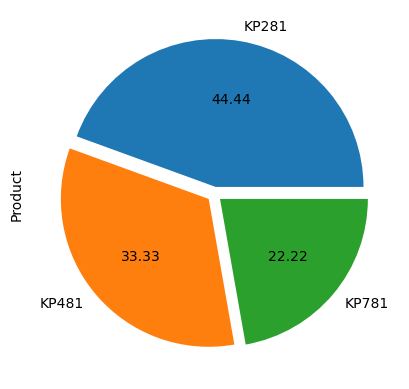

In [ ]:
# Distribution of Products
explode = (0.05, 0.05, 0.05)
data["Product"].value_counts().plot(kind="pie",autopct="%.2f",explode = explode)

<Axes: ylabel='Gender'>

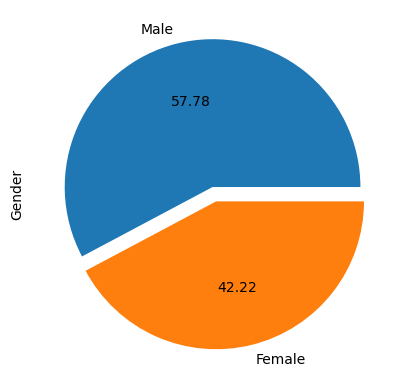

In [ ]:
# Distribution of Gender
explode = (0.05, 0.05)
data["Gender"].value_counts().plot(kind="pie",autopct="%.2f",explode = explode)

<Axes: ylabel='MaritalStatus'>

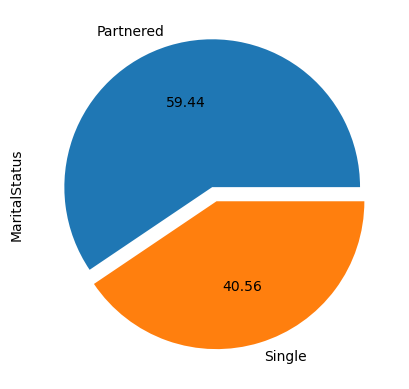

In [ ]:
# Distribution by Marital Status
explode = (0.05, 0.05)
data["MaritalStatus"].value_counts().plot(kind="pie",autopct="%.2f",explode = explode)

In [ ]:
tmp_df = data

conditions = [
    (tmp_df['Product'] == 'KP281'),
    (tmp_df['Product'] == 'KP481'),
    (tmp_df['Product'] == 'KP781')
]
prices = [1500, 1750, 2500]
tmp_df['Price'] = np.select(conditions,prices)
tmp_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500
176,KP781,42,Male,18,Single,5,4,89641,200,2500
177,KP781,45,Male,16,Single,5,5,90886,160,2500
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500


<Axes: title={'center': 'Revenue generated by each treadmill'}, xlabel='Product', ylabel='Price'>

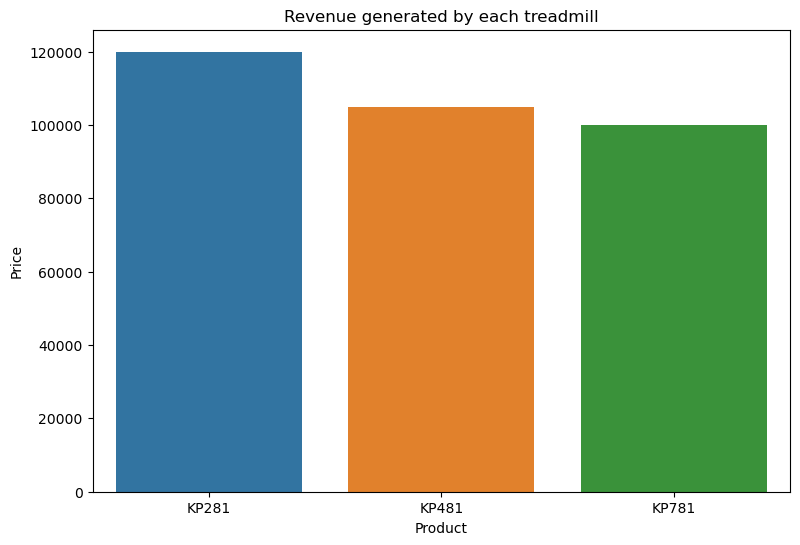

In [ ]:
# Analysis on revenue generated by each treadmill
tred_rev = tmp_df.groupby('Product')['Price'].sum().reset_index()
fig = plt.figure(figsize=(9,6))
plt.title("Revenue generated by each treadmill")
sns.barplot(data = tred_rev, x = 'Product', y = 'Price')

#### Some insight from above plot
KP281 generated the highest revenue of approximately 120,000 USD, while the expensive KP781 generated the lowest of the lot, 50,000 USD. This implies higher sale of KP281, the cheapest one, the most.

# Bivariate Analysis

### Checking if Gender and Marital Status having any effect on Product purchased.

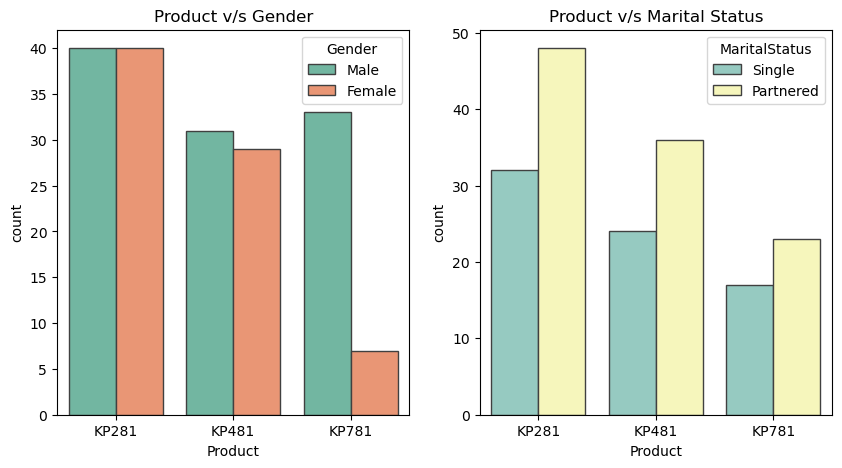

In [ ]:
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

sns.countplot(data = data, x = "Product", hue = "Gender",edgecolor="0.25", palette='Set2', ax = axis[0])
sns.countplot(data = data, x = "Product", hue = "MaritalStatus", edgecolor = '0.25', palette = 'Set3', ax = axis[1])

axis[0].set_title("Product v/s Gender")
axis[1].set_title("Product v/s Marital Status")

plt.show()

#### Product v/s Gender
1) For Product KP281 equal number of male & female customers.
2) For Product KP481 male customer are slightly more comparing to female customer.
3) For Product KP781 male customer are very high comparing to female customer.
#### Product v/s Marital Status
1) It looks like partnered customers are more likely to buy our product.

### Checking if Age, Education, Usage, Fitness, Income, Miles effect the purchase of products.

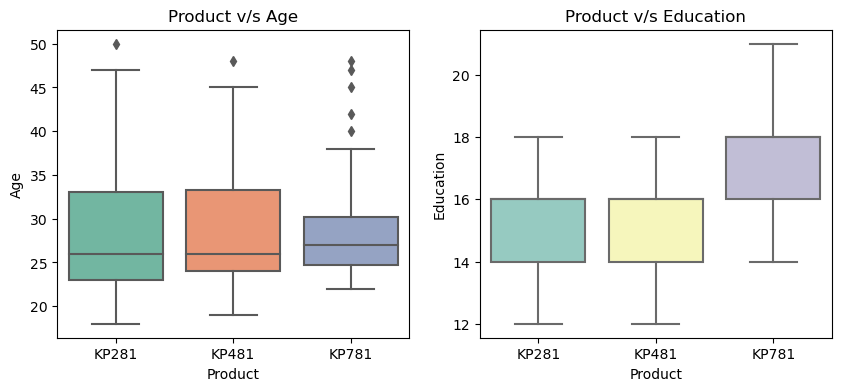

In [ ]:
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

sns.boxplot(data = data, x = "Product", y = "Age", ax = axis[0], palette = 'Set2')
sns.boxplot(data = data, x = "Product", y = "Education", ax = axis[1], palette = 'Set3')

axis[0].set_title("Product v/s Age")
axis[1].set_title("Product v/s Education")

plt.show()

#### Product v/s Age
1) For product KP281 & KP481 median age of customers are approximately equal.
2) For product KP781 50% of customers are from age group 25 to 33.
#### Product v/s Education
1) Customers above Education of 16 years are more likely to buy product KP781
2) Customers below 16 years of education are having equal chances of buying product KP281, KP481

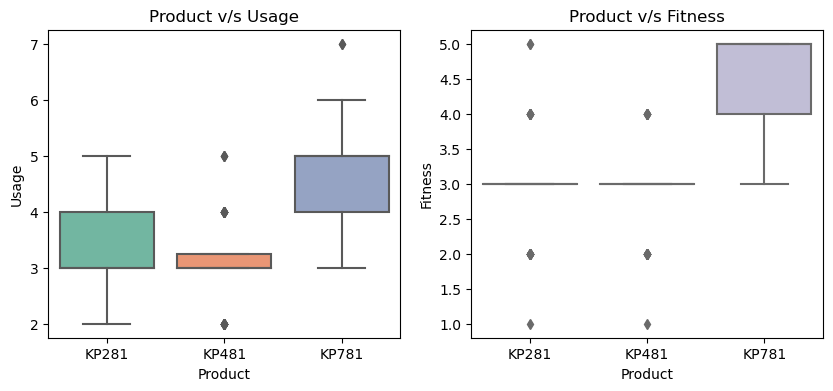

In [ ]:
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

sns.boxplot(data = data, x = "Product", y = "Usage", ax = axis[0], palette = 'Set2')
sns.boxplot(data = data, x = "Product", y = "Fitness", ax = axis[1], palette = 'Set3')

axis[0].set_title("Product v/s Usage")
axis[1].set_title("Product v/s Fitness")

plt.show()

#### Product v/s Usage
1) 50% Customers with product KP281 use 3 to 4 days per week.
2) 50% Customers with product KP481 use very less with 3 days week.
3) 50% Customers with product KP781 use 4 to 5 days per week.
#### Product v/s Fitness
1) Customer with product KP781 is likely to be more fit. As more than 75% customers rated themselves >= 4 out of 5 for fitness.

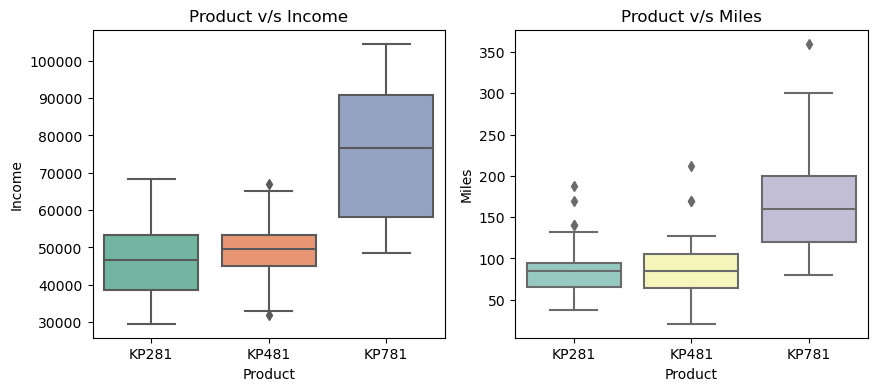

In [ ]:
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

sns.boxplot(data = data, x = "Product", y = "Income", ax = axis[0], palette = 'Set2')
sns.boxplot(data = data, x = "Product", y = "Miles", ax = axis[1], palette = 'Set3')

axis[0].set_title("Product v/s Income")
axis[1].set_title("Product v/s Miles")

plt.show()

#### Product v/s Income
1) Higher the income of customer (>= 59,000) chances is he/she is going to purchase product KP781.
#### Product v/s Miles
1) If the customer is covering more than 120 miles/week, it is more likely that the customer will purchase product KP781.
2) Miles comparission of customers by product  KP781 > KP481 > KP 281

<Axes: >

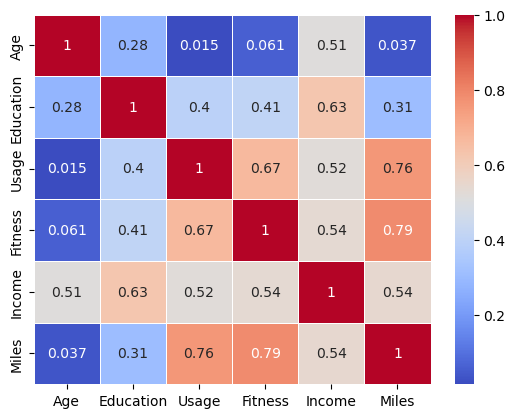

In [ ]:
# Checking for correlation between integer columns.
selected_cols = data[["Age","Education","Usage","Fitness","Income","Miles"]]
sns.heatmap(selected_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

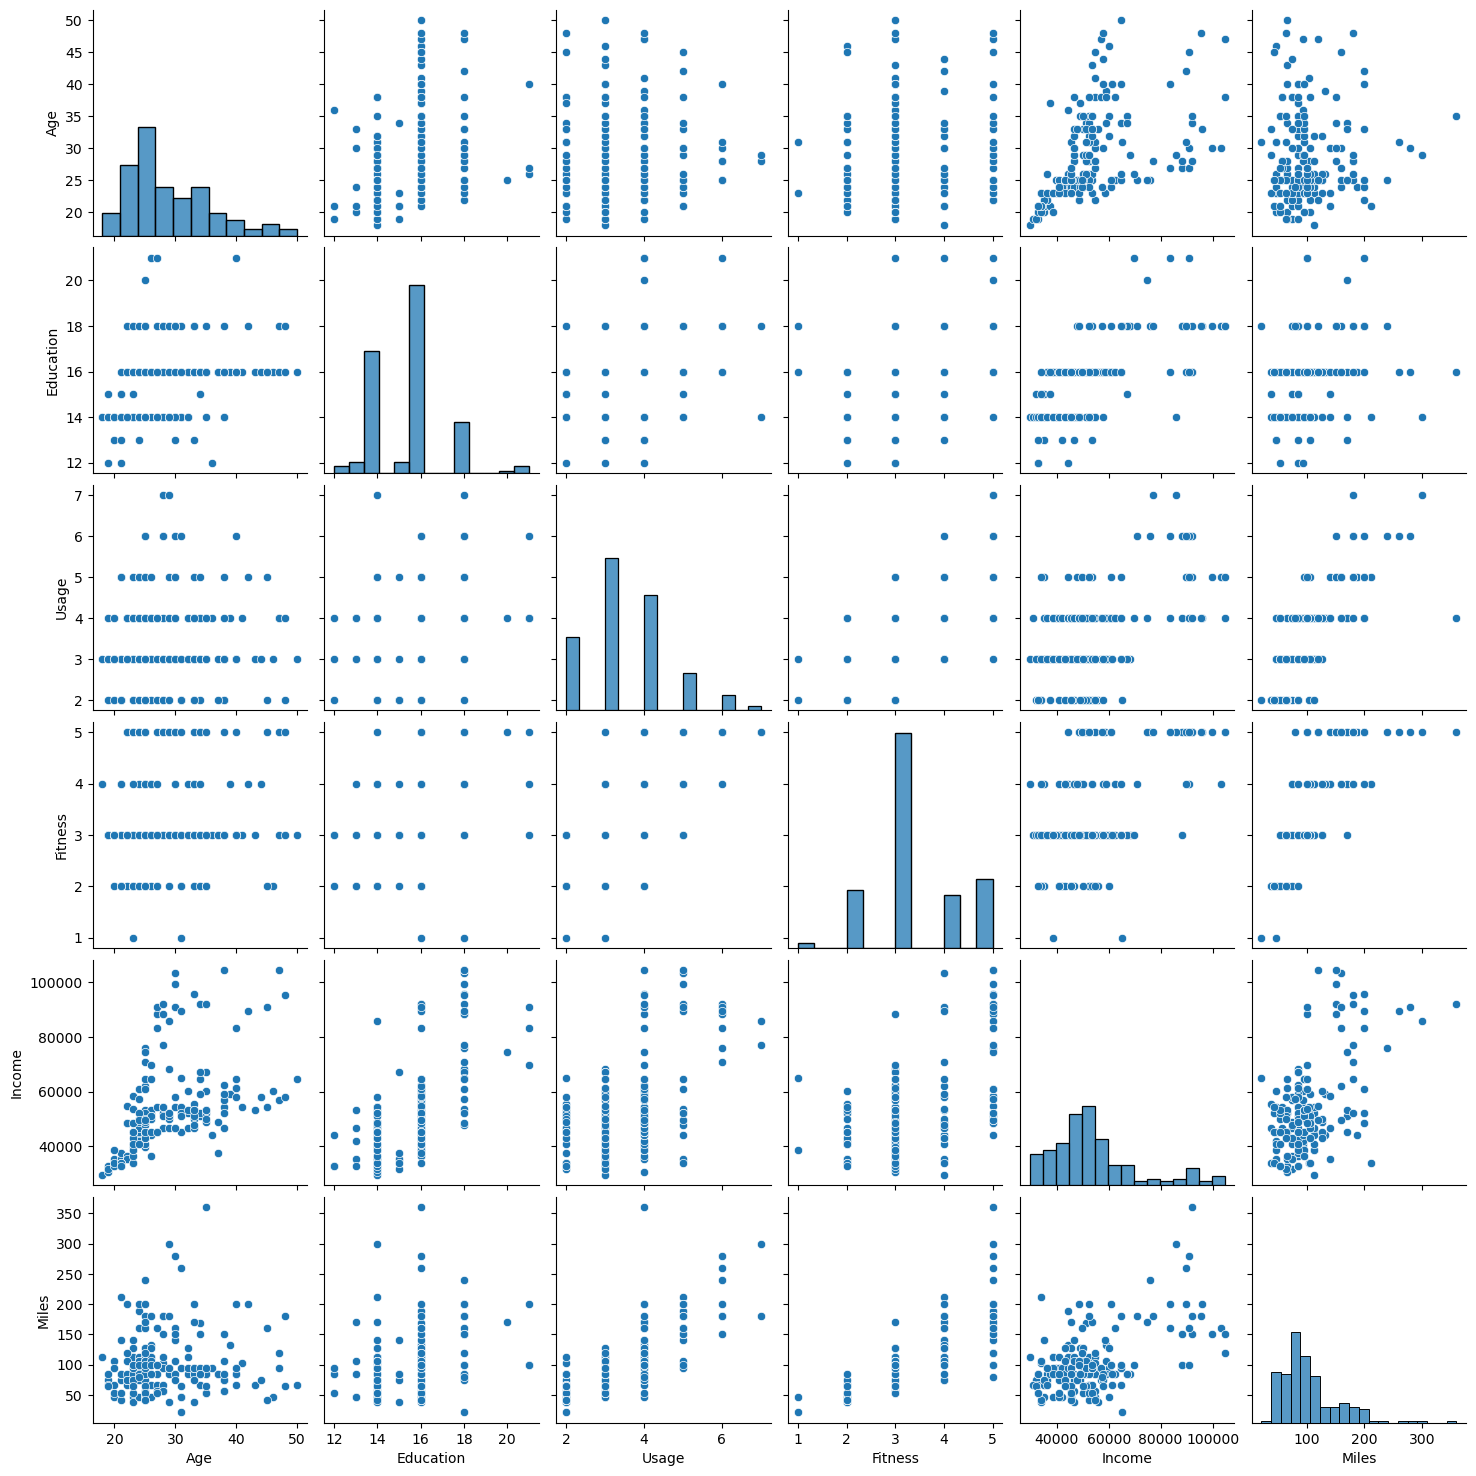

In [ ]:
# For more further co-relation we can see pair plot also.
sns.pairplot(data)

# Multivariate Analysis
### Customer Profiling(Categorization of user ) / Deep dive analysis on the basis of gender.

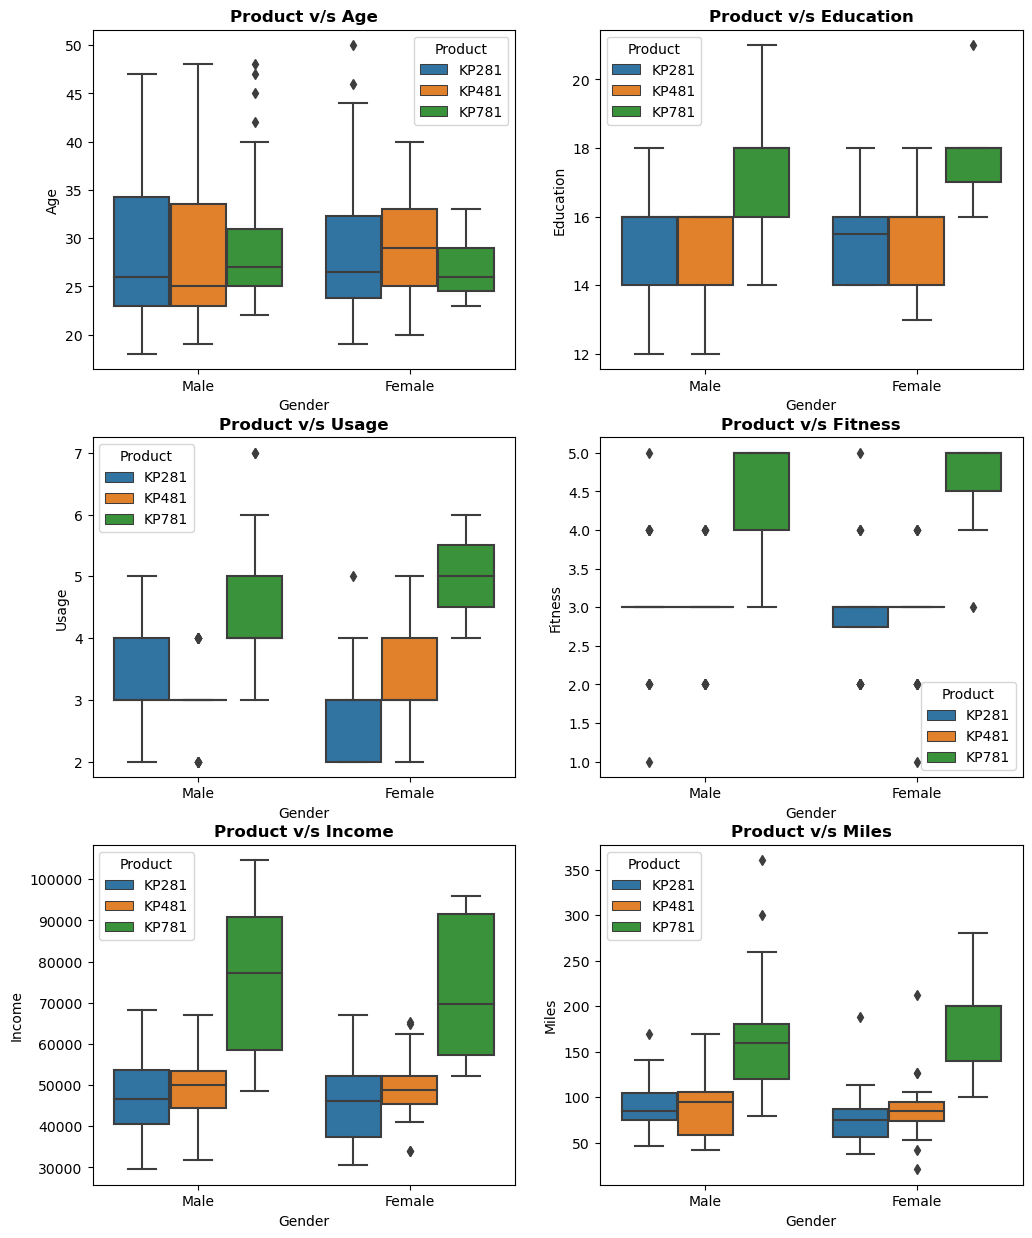

In [ ]:
# Boxplot of all the attributes with
attributes = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]

fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (12,15))

attr_num = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data = data, x = "Gender", y = attributes[attr_num], hue = "Product", ax = axis[i,j])
        axis[i,j].set_title(f"Product v/s {attributes[attr_num]}", fontweight = "bold")

        attr_num += 1

### Some Insights from above code :-
1) Male and female educated above 16 years are more likely to buy product KP781.
2) Male who are going to use treadmill 3-4 days per week & female 2-3 days per week are more likely to buy product KP281
3) Male who are going to use treadmill 4-5 days per week & female >= 4 days per week are more likely to buy product KP781
4) Female who is going to use 3-4 days per week is more likely to buy product KP481.
5) Male who are > 4 and female who are > 4.5 on fitness are more likely to buy Product KP781.
6) Male and female who's income(approx) is > 59,000 are more likely to buy Product KP781.
7) Male who are running more than 120 miles/week & female who are running more than 140 miles/week are more likely to buy Product KP781.

<Axes: xlabel='Income', ylabel='Density'>

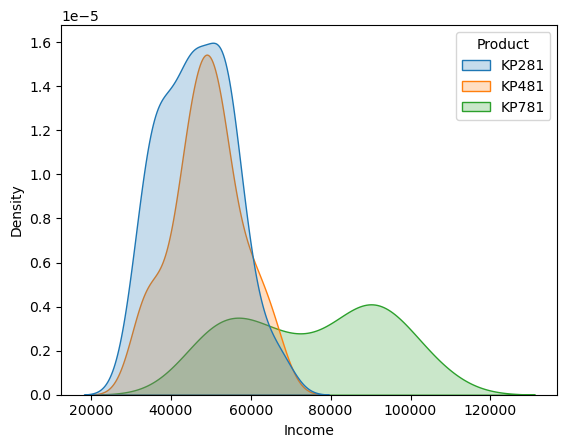

In [ ]:
sns.kdeplot(data = data, x = 'Income', hue = 'Product', fill = True)

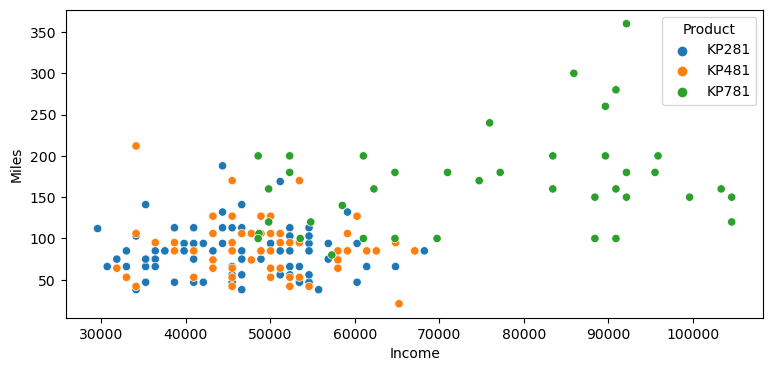

In [ ]:
fig = plt.figure(figsize = (9,4))
sns.scatterplot(data = data, x = 'Income', y = 'Miles', hue = 'Product')
plt.show()

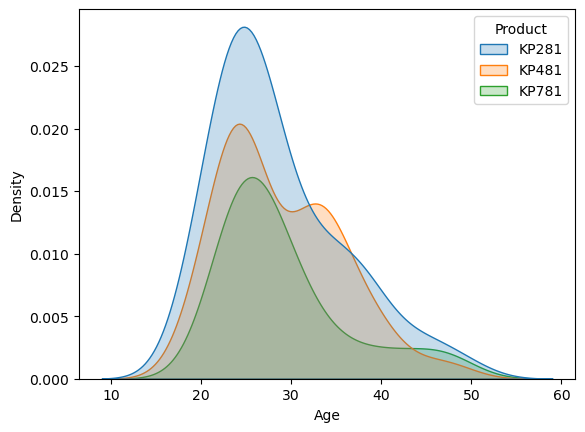

In [ ]:
# kde plot between Age and Product
sns.kdeplot(data = data, x = 'Age', hue = 'Product', fill = True)
plt.show()

### Analysis on the basis of categorical/object columns only.

In [ ]:
data.groupby(['Gender', 'MaritalStatus', 'Product']).size()

Gender  MaritalStatus  Product
Female  Partnered      KP281      27
                       KP481      15
                       KP781       4
        Single         KP281      13
                       KP481      14
                       KP781       3
Male    Partnered      KP281      21
                       KP481      21
                       KP781      19
        Single         KP281      19
                       KP481      10
                       KP781      14
dtype: int64

In [ ]:
data.groupby(['Gender', 'MaritalStatus', 'Product']).size().unstack()

Product               KP281  KP481  KP781
Gender MaritalStatus                     
Female Partnered         27     15      4
       Single            13     14      3
Male   Partnered         21     21     19
       Single            19     10     14

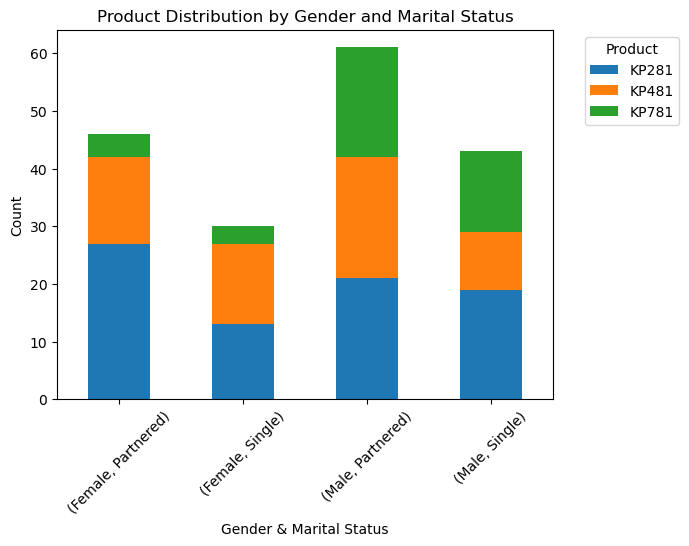

In [ ]:
df_grouped = data.groupby(['Gender', 'MaritalStatus', 'Product']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Gender & Marital Status')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.title('Product Distribution by Gender and Marital Status')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Marginal and Conditional Probability

In [ ]:
# Finding marginal probability
marginal_prob_table = pd.crosstab(index = data['Product'], columns = 'Count', normalize = True)
marginal_prob_table.rename(columns = {'Count' : 'Probability'}, inplace = True)
marginal_prob_table

col_0,Probability
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


In [ ]:
# Finding marginal probabilty(in percentage) of Products in table form.
gender_percentage = data['Product'].value_counts(normalize = True) * 100
pd.DataFrame({'Product': gender_percentage.index, 'Percentage': gender_percentage.values})

,Product,Percentage
0,KP281,44.444444
1,KP481,33.333333
2,KP781,22.222222


In [ ]:
# Conditional Probability

def conditional_probability(gender, marginal = False):

    if gender != 'Male' and gender != 'Female':
        return 'Please enter a valid gender.'

    df = pd.crosstab(index = data['Gender'], columns = data['Product'])

    if marginal:
        print(f"P(Male): {df.loc['Male'].sum() / len(data):.2f}")
        print(f"P(Female): {df.loc['Female'].sum() / len(data):.2f}\n")

    p_781 = df['KP781'][gender] / df.loc[gender].sum()
    p_481 = df['KP481'][gender] / df.loc[gender].sum()
    p_281 = df['KP281'][gender] / df.loc[gender].sum()

    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")

conditional_probability('Male', True)
conditional_probability('Female')


P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



### Contigency Tables

In [ ]:
# Product vs Fitness
pd.crosstab(data["Product"], data["Fitness"],margins = True, normalize = True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.005556,0.077778,0.300000,0.050000,0.011111,0.444444
KP481,0.005556,0.066667,0.216667,0.044444,0.000000,0.333333
KP781,0.000000,0.000000,0.022222,0.038889,0.161111,0.222222
All,0.011111,0.144444,0.538889,0.133333,0.172222,1.000000


In [ ]:
# Product vs Usage
pd.crosstab(data['Product'], data['Usage'], margins = True, normalize = 'index')

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.237500,0.462500,0.275000,0.025000,0.000000,0.000000
KP481,0.233333,0.516667,0.200000,0.050000,0.000000,0.000000
KP781,0.000000,0.025000,0.450000,0.300000,0.175000,0.050000
All,0.183333,0.383333,0.288889,0.094444,0.038889,0.011111


In [ ]:
# Product vs Education
pd.crosstab(data['Product'], data['Education'], margins = True, normalize = 'index')

Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,0.025000,0.037500,0.375000,0.050000,0.487500,0.025000,0.000000,0.000000
KP481,0.016667,0.033333,0.383333,0.016667,0.516667,0.033333,0.000000,0.000000
KP781,0.000000,0.000000,0.050000,0.000000,0.375000,0.475000,0.025000,0.075000
All,0.016667,0.027778,0.305556,0.027778,0.472222,0.127778,0.005556,0.016667


In [ ]:
# Product vs Gender
pd.crosstab(data['Product'], data['Gender'], margins = True, normalize = 'index')

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000
All,0.422222,0.577778


In [ ]:
# Product vs Marital Status
pd.crosstab(data['Product'], data['MaritalStatus'], margins = True, normalize = 'index')

MaritalStatus,Partnered,Single
Product,,
KP281,0.600000,0.400000
KP481,0.600000,0.400000
KP781,0.575000,0.425000
All,0.594444,0.405556


In [ ]:
# Product vs age
age_bins = [18, 30, 40, 51]
age_labels = ['18-30', '30-40', '40-50']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

pd.crosstab(data['Product'], data['Age Group'], margins = True, normalize = 'index')


Age Group,18-30,30-40,40-50
Product,,,
KP281,0.662500,0.250000,0.087500
KP481,0.550000,0.366667,0.083333
KP781,0.675000,0.200000,0.125000
All,0.627778,0.277778,0.094444


In [ ]:
# Product vs Income
income_bins = [29000, 40000, 60000, 80000, 105000]
income_labels = ['29k-40k', '40k-60k', '60k-80k', '80k-105k']
data["Income Group"] = pd.cut(data['Income'], bins = income_bins, labels = income_labels)

pd.crosstab(data['Product'], data['Income Group'], margins = True, normalize = 'index')

Income Group,29k-40k,40k-60k,60k-80k,80k-105k
Product,,,,
KP281,0.287500,0.637500,0.075000,0.000000
KP481,0.150000,0.733333,0.116667,0.000000
KP781,0.000000,0.275000,0.250000,0.475000
All,0.177778,0.588889,0.127778,0.105556


# Top Insights:

1) The dataset consists of 108 rows and 9 columns.
2) Of the columns, 6 are of object type, and 3 are of integer type.
#### Product Insights:
3) The 'Product' column includes three unique products: KP281, KP481, and KP781.
4) KP281 is the most frequently purchased product.
#### Customer Demographics:
5) The mean age of Aerofit customers is approx 29 years, ranging from 18 to 50 years.
6) 75% of customers fall within the age range of 18 to 33, indicating a younger customer base.
7) The mean education duration for customers is 15.57 years, with 75% having 16 or fewer years of education.
8) Out of 108 customers, 107 are partnered.
#### Product Usage & Fitness:
9) The mean treadmill usage per week is 3.45 days, with 75% of customers using it 2 to 4 days per week.
10) The mean fitness rating is 3.31, with 75% of customers rating themselves 4 or lower on a scale of 0 to 5.
#### Income & Miles:
11) Income and miles have high standard deviations, indicating potential outliers.
12) Higher the income and miles covered more chances is of purchsing product KP781
#### Gender & Marital Status:
13) There are more male customers (57.78%) than female customers (42.22%).
14) Partnered customers are more likely to purchase products.
#### Product Distribution:
15) KP281: 44.44%
    KP481: 33.33%
    KP781: 22.22%
#### Product Insights by Gender:
16) For KP281, there is an equal number of male and female customers.
17) For KP481, male customers slightly outnumber female customers.
18) For KP781, male customers significantly outnumber female customers.
19) For KP781, 50% of customers are aged 25 to 33.
20) Customers with over 16 years of education are more likely to buy KP781.
#### Product Insights by Education:
21) Customers with less than 16 years of education are equally likely to buy KP281 or KP481.
#### Product Insights by Usage:
22) For KP281, 50% of customers use the treadmill 3 to 4 days per week.
23) For KP781, 50% of customers use the treadmill 4 to 5 days per week.
#### Fitness & Product Purchase:
24) Higher fitness rating (>= 4) is associated with KP781 purchases.
25) Higher income (>= 59000) is associated with KP781 purchases.
#### Miles & Product Purchase:
26) Covering over 120 miles/week increases the likelihood of purchasing KP781.
#### Education & Product Purchase:
27) Males and females with over 16 years of education are more likely to buy KP781.
#### Usage & Gender for KP281:
28) Males using the treadmill 3-4 days and females using it 2-3 days are more likely to buy KP281.
#### Usage & Gender for KP781:
29) Males using the treadmill 4-5 days and females using it >= 4 days are more likely to buy KP781.
#### Usage & Gender for KP481:
30) Females using the treadmill 3-4 days are more likely to buy KP481.
#### Fitness & Gender for KP781:
31) Males and females with fitness ratings > 4 are more likely to buy KP781.
#### Income & Gender for KP781:
32) Males and females with income >= 59,000 are more likely to buy KP781.
#### Miles & Gender for KP781:
33) Males covering over 120 miles/week and females covering over 140 miles/week are more likely to buy KP781.
#### Income Insights:
34) Most customers who purchased treadmills earn between 40,000 and 50,000.
35) Customers with salaries exceeding 75,000 are more likely to buy KP781.
#### Gender & Product Preferences:
36) KP281 is more likely to be purchased by partnered females.
37) KP781 is more likely to be purchased by single and partnered males.
#### Marginal Probability:
38) Marginal probabilities for product purchase:
- KP281: 44.44%
- KP481: 33.33%
- KP781: 22.22%

#### Conditional Probability:
39) Conditional probabilities:
- P(Male): 58%
- P(Female): 42%
- P(KP781/Male): 32%
- P(KP481/Male): 30%
- P(KP281/Male): 38%
- P(KP781/Female): 9%
- P(KP481/Female): 38%

# Recommendations:
#### 1) Target Younger Audiences:
Given that 75% of customers are aged 18 to 33, consider tailoring marketing campaigns and product features to appeal to a younger audience.
#### 2) Educational Content:
Since the average education duration is 15.57 years, you could provide educational content about the benefits of
fitness and treadmill use to engage and inform customers.
#### 3) Partnered Customer Focus:
As the majority of customers are partnered, offer family or couple fitness packages to attract and retain this demographic.
#### 4) Fitness Programs:
Promote fitness programs or personalized training plans to customers who rate their fitness level as lower than 4, as we have seen customer above 4 fitness rating tends to buy KP781.
#### 5) Income-Based Targeting:
Since customers with higher incomes are more likely to purchase KP781, focus marketing efforts on this product to higher-income segments
#### 6) New Product:
A better product with better features such as advanced fitness tracking and estimator, for highly-educated, high income and active customers to increase revenue and profit margin for Aerofit.
#### 7) Campaigns:
Campaigns to promote KP781 product for females specially.
#### 8) Discounts:
Since KP281 and KP481 also brings in significant revenue and is prefered by young & learnings individuals, added features and specialized discounts could help boost sales.